<a href="https://colab.research.google.com/github/moathzyout/Project/blob/Code/Featureselection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
import pandas as pd 
per_level=pd.read_csv('/content/drive/My Drive/permissions.csv')

In [ ]:
per_level['permmisions']=per_level['permmisions'].apply(lambda x:str(x).lower())
permiss=per_level['permmisions']
perm_split=per_level['permmisions'].apply(lambda x:x.replace(',','').replace('android.permission.',' ').strip().split('.')[-1])

In [ ]:
perm_split

0        modify_audio_settings record_audio get_tasks i...
1        access_wifi_state change_wifi_state internet a...
2        bluetooth access_wifi_state internet access_ne...
3        access_coarse_location restart_packages access...
4        uninstall_shortcut read_sms read_logs write_ex...
                               ...                        
16066                                              receive
16067    install_shortcut install_packages write_extern...
16068    install_shortcut read_sms write_sms write_exte...
16069                                              receive
16070    install_shortcut write_external_storage intern...
Name: permmisions, Length: 16071, dtype: object

In [ ]:
lis_value=set()
lis_u=set()
lis_length=[ ]
for perm in perm_split:
    for p in perm.split(' ') :
        if p!='' or p!='nan' :
             lis_u.add(p)

dic={}
for i,perm in enumerate(perm_split):
      lis_value=[ ]
      for p in list(lis_u) :
           if p in perm:
              lis_value.append(1) 
           else:
               lis_value.append(0) 
      dic.update({i:lis_value})
data=pd.DataFrame(dic.values(),columns=list(lis_u))
data[data['bind_notification_listener_service']==1]

,,internal_component,write_user_dictionary,capture_video_output,expand_status_bar,full_screen,access_mock_location,extension_permission,modify_audio_settings,call_privileged,...,prevent_power_key,set_always_finish,write_history_bookmarks,share_data,receive_sms,access_network_state,delete_cache_files,write_use_app_feature_survey,bind_input_method,read_gservices
2203,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3440,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3785,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4001,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np 
encoder=LabelEncoder()
encode_label=encoder.fit_transform(per_level['type'])
labels_full=to_categorical(encode_label)
labels=np.unique(per_level.type).tolist()
labels

['Adware', 'Banking', 'Benign', 'Riskware', 'SMS']

In [ ]:
_features=data.columns
_features
train=data.values
train
from sklearn.feature_selection import mutual_info_classif


res = dict(zip(_features, mutual_info_classif(train,np.argmax(labels_full,axis=1) , discrete_features=True)
               ))
print(res)

{'': 0.0, 'internal_component': 0.0001718878314257513, 'write_user_dictionary': 0.0007738589741568772, 'capture_video_output': 0.0002578490570066794, 'expand_status_bar': 0.0021638007922078063, 'full_screen': 0.0006626725181115757, 'access_mock_location': 0.005032985171882193, 'extension_permission': 0.0002578490570066794, 'modify_audio_settings': 0.0038731752798937275, 'call_privileged': 0.004801890144935806, 'a4s_send': 0.0002578490570066794, 'receiver': 0.00010058454802806729, 'service': 0.013716807123640117, 'full': 0.0037280983948417903, 'scrobblet_private_service': 8.593814695031078e-05, 'bluetooth_admin': 0.007551666092916461, 'unlock_premium': 8.593814695031078e-05, 'set_pointer_speed': 0.002251668755390084, 'auth_service': 0.0001536454885162125, 'internal_system_window': 0.007111737788659986, 'access_all_download': 0.0002578490570066794, 'receive_commnunity_notification': 8.593814695031078e-05, 'call_phone': 0.058454903065562, 'vibrator': 8.593814695031078e-05, 'subscribed_fee

In [ ]:
lis=pd.Series(mutual_info_classif(train,np.argmax(labels_full,axis=1) , discrete_features=True))

In [ ]:
lis.sort_values(ascending=False,inplace=True)
lis.index=_features

In [ ]:
lis

                                0.214718
internal_component              0.210824
write_user_dictionary           0.200271
capture_video_output            0.179708
expand_status_bar               0.167342
                                  ...   
access_network_state            0.000086
delete_cache_files              0.000086
write_use_app_feature_survey    0.000086
bind_input_method               0.000086
read_gservices                  0.000000
Length: 417, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectPercentile,SelectKBest
X_new_binary = SelectPercentile(mutual_info_classif, percentile=10).fit(train,np.argmax(labels_full,axis=1))

In [ ]:
X_new_binary

SelectPercentile(score_func=<function mutual_info_classif at 0x7fd64f52ea70>)

In [ ]:

X_new_binary.index=lis.index


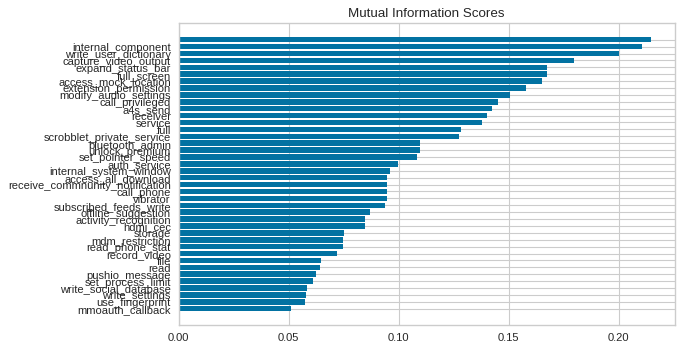

In [ ]:
import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=80, figsize=(8, 5))
plot_mi_scores(lis[0:40])

In [ ]:
binary_featuers=train[:,X_new_binary.get_support(indices=True)]
binary_featuers

array([[0, 1, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 1]])

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve
from sklearn.feature_selection import SelectPercentile,SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
X_new_binary = SelectPercentile(mutual_info_classif, percentile=40).fit(train,np.argmax(labels_full,axis=1))
# Create the validation curve visualizer
binary_featuers=train[:,X_new_binary.get_support(indices=True)]
print(binary_featuers.shape)
cv = StratifiedKFold(5)
gamma_grid = np.logspace(-6, -1, 6)
param_grid = dict(gamma=gamma_grid)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(binary_featuers, np.argmax(labels_full,axis=1))
print(grid.best_score_)


(16071, 167)
0.9342915762202881


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve
from sklearn.feature_selection import SelectPercentile,SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
X_new_binary = SelectPercentile(mutual_info_classif, percentile=50).fit(train,np.argmax(labels_full,axis=1))
X_new_binary.index=lis.index
# Create the validation curve visualizer
binary_featuers=train[:,X_new_binary.get_support(indices=True)]
print(binary_featuers.shape)
cv = StratifiedKFold(5)
gamma_grid = np.logspace(-6, -1, 6)
param_grid = dict(gamma=gamma_grid)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(binary_featuers, np.argmax(labels_full,axis=1))
print(grid.best_score_)


(16071, 208)
0.9413851917301927


In [ ]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

feature_extraction = TfidfVectorizer()
train = feature_extraction.fit_transform(per_level['permmisions'].values)


In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np 
encoder=LabelEncoder()
encode_label=encoder.fit_transform(per_level['type'])
labels_full=to_categorical(encode_label)
labels=np.unique(per_level.type).tolist()
labels

['Adware', 'Banking', 'Benign', 'Riskware', 'SMS']

In [ ]:
%pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'APK_Name', 'permmisions'], dtype='object')

In [ ]:
from sklearn.feature_selection import mutual_info_classif


res = dict(zip(train.columns, mutual_info_classif(train,np.argmax(labels_full,axis=1) , discrete_features=True)
               ))
print(res)

AttributeError: ignored

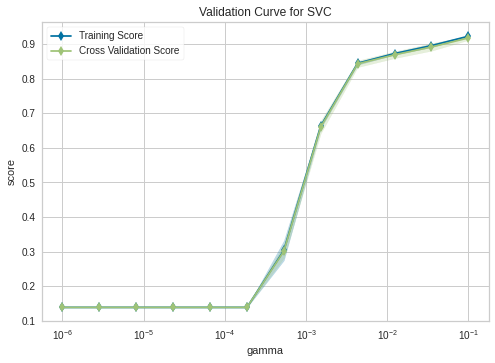

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve


# Create the validation curve visualizer
cv = StratifiedKFold(5)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve(
    SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,
)

viz.fit(train, np.argmax(labels_full,axis=1))

viz.show()

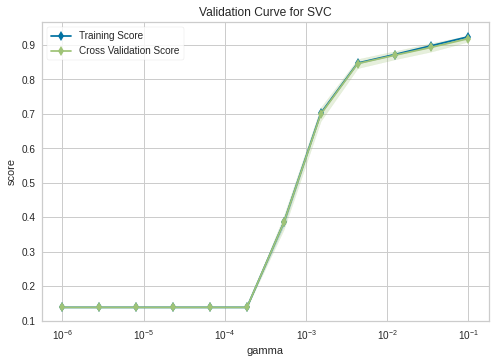

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve


# Create the validation curve visualizer
cv = StratifiedKFold(10)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve(
    SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,
)

viz.fit(train, np.argmax(labels_full,axis=1))

viz.show()

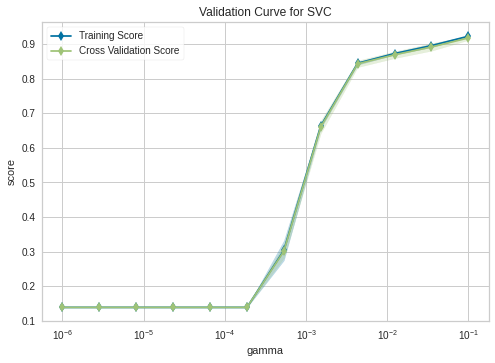

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve


# Create the validation curve visualizer
cv = StratifiedKFold(5)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve(
    SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,
)

viz.fit(train, np.argmax(labels_full,axis=1))

viz.show()

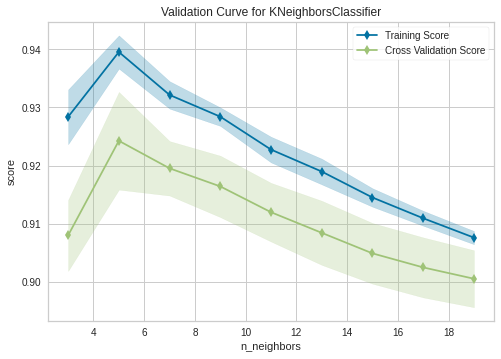

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

cv = StratifiedKFold(5)
param_range = np.arange(3, 20, 2)

oz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,
)

# Using the same game dataset as in the SVC example
oz.fit(train, np.argmax(labels_full,axis=1))
oz.show()

In [ ]:
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer()
train = feature_extraction.fit_transform(per_level['permmisions'].values)
feature_extraction.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['a1a185',
 'a4s_send',
 'a_tm',
 'aa',
 'aa2',
 'aaa',
 'aaamaps',
 'aadhk',
 'aam2',
 'aandrill',
 'abaenglish',
 'abbyy',
 'ablamc',
 'abs',
 'abtnprojects',
 'acallfromsanta',
 'acccess_network_state',
 'accelerometer',
 'acces_mock_location',
 'acces_network_state',
 'access',
 'access_account',
 'access_account_util',
 'access_af_service',
 'access_all_download',
 'access_all_downloads',
 'access_all_external_storage',
 'access_api',
 'access_assisted_gps',
 'access_awareservice',
 'access_background_service',
 'access_backscreen',
 'access_bluetooth_share',
 'access_cache_filesystem',
 'access_checkin_properties',
 'access_checkin_properttes',
 'access_coarse',
 'access_coarse_gps',
 'access_coarse_location',
 'access_coarse_updates',
 'access_company',
 'access_control',
 'access_corse_location',
 'access_course_location',
 'access_data',
 'access_download_manager',
 'access_download_manager_advanced',
 'access_dxownload_manager',
 'access_final_location',
 'access_find_locatio

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np 
encoder=LabelEncoder()
encode_label=encoder.fit_transform(per_level['type'])
labels_full=to_categorical(encode_label)
labels=np.unique(per_level.type).tolist()
labels

['Adware', 'Banking', 'Benign', 'Riskware', 'SMS']

In [ ]:
from sklearn.feature_selection import mutual_info_classif


res = dict(zip(feature_extraction.get_feature_names(), mutual_info_classif(train,np.argmax(labels_full,axis=1) , discrete_features=True)
               ))
print(res)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for ta

{'a1a185': 8.593814695031078e-05, 'a4s_send': 0.00042980614579244466, 'a_tm': 8.593814695031078e-05, 'aa': 8.593814695031078e-05, 'aa2': 8.593814695031078e-05, 'aaa': 8.593814695031078e-05, 'aaamaps': 8.593814695031078e-05, 'aadhk': 0.00025784905700667975, 'aam2': 8.593814695031078e-05, 'aandrill': 8.593814695031078e-05, 'abaenglish': 0.0001718878314257513, 'abbyy': 8.593814695031078e-05, 'ablamc': 8.593814695031078e-05, 'abs': 0.0001718878314257513, 'abtnprojects': 8.593814695031078e-05, 'acallfromsanta': 8.593814695031078e-05, 'acccess_network_state': 8.593814695031078e-05, 'accelerometer': 0.0003319332534911161, 'acces_mock_location': 0.0002940526186411699, 'acces_network_state': 8.593814695031078e-05, 'access': 0.0011180968615737523, 'access_account': 0.00042980614579244466, 'access_account_util': 8.593814695031078e-05, 'access_af_service': 0.0001718878314257513, 'access_all_download': 8.593814695031078e-05, 'access_all_downloads': 0.0006163633282552188, 'access_all_external_storag

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

In [ ]:
lis=pd.Series(mutual_info_classif(train,np.argmax(labels_full,axis=1)))

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for ta

In [ ]:
per_level

,Unnamed: 0,Unnamed: 0.1,APK_Name,permmisions,type
0,0,0,0008b849c70477faf464e80df6c7ea91569f78bd2f13af...,"modify_audio_settings, record_audio, get_task...",Adware
1,1,1,0015ae7c27688d45f79170dcea16131ce557912a1a0c5f...,"access_wifi_state, change_wifi_state, interne...",Adware
2,2,2,002fb7803cd8c0549bc7eb023458618520a3f0939e6ece...,"bluetooth, access_wifi_state, internet, acces...",Adware
3,3,3,00325582d7caaf0f36ad333869df444a1aa39326e60745...,"access_coarse_location, restart_packages, acc...",Adware
4,4,4,00567501fe3517b1bf6b363dd6c4d0972a77c591b0d7c2...,"restart_packages, mount_unmount_filesystems, ...",Adware
...,...,...,...,...,...
16066,4816,4816,ffa7d5600e82f89d4a93a068697336b824020fdc456f37...,"internet,com.software.application.permission....",SMS
16067,4817,4817,ffa9c5c0b315995db25deea05ca1d9fcda925757c30f07...,"internet, access_coarse_updates, access_coars...",SMS
16068,4818,4818,ffd7935393ffb9c8a6fb1f3932a0fbcfd0295172bff3f4...,"internet, process_outgoing_calls, call_phone,...",SMS
16069,4819,4819,ffe183625bb11bdf21494d10cdaaaf1f4b5ea2e5748209...,"internet,com.software.application.permission....",SMS


In [ ]:
lis.sort_values(ascending=False,inplace=True)
lis.index=feature_extraction.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:


from sklearn.feature_selection import SelectPercentile,SelectKBest
X_new = SelectPercentile(mutual_info_classif, percentile=10).fit(train,np.argmax(labels_full,axis=1))
X_new.index=lis.index
featuers=train[:,X_new.get_support(indices=True)]


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for ta

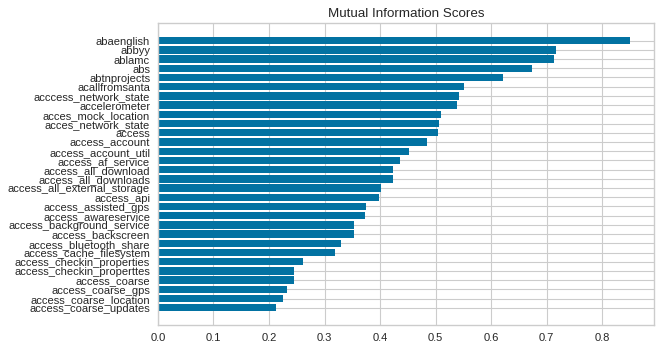

In [ ]:

import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=80, figsize=(8, 5))
plot_mi_scores(lis[10:40])

In [ ]:
from sklearn.feature_selection import SelectPercentile,SelectKBest
X_new = SelectPercentile(mutual_info_classif, percentile=50).fit(train,np.argmax(labels_full,axis=1))
X_new.index=feature_extraction.get_feature_names()
X_new


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/cluster/_supervised.py:65: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for ta

SelectPercentile(percentile=50,
                 score_func=<function mutual_info_classif at 0x7fd64f52ea70>)

In [ ]:
featuers=train[:,X_new.get_support(indices=True)]
featuers.shape

(16071, 2509)

In [ ]:
cv = StratifiedKFold(5)
gamma_grid = np.logspace(-6, -1, 6)
param_grid = dict(gamma=gamma_grid)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(featuers, np.argmax(labels_full,axis=1))
print(grid.best_score_)


In [ ]:
X_new.get_support(indices=True)
X_new.index,X_new.scores_
lis5=pd.Series(X_new.scores_)
lis5.index=X_new.index
lis5.sort_values(ascending=False,inplace=True)
lis5

internet                  1.477393
read_phone_state          1.339805
write_external_storage    1.288918
access_network_state      1.252924
send_sms                  1.031855
                            ...   
vn20151126                0.000075
henzv                     0.000075
in20151225                0.000075
in20160116                0.000075
id20160111                0.000075
Length: 5018, dtype: float64

In [ ]:
X_new.get_support(indices=True).shape
plt.figure(dpi=80, figsize=(8, 5))
plot_mi_scores(lis5[10:40])

In [ ]:
train.shape

In [ ]:
featuers=train[:,X_new.get_support(indices=True)]


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve

cv = StratifiedKFold(4)
param_range = np.arange(3, 20, 2)

oz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,
)

# Using the same game dataset as in the SVC example
oz.fit(featuers, np.argmax(labels_full,axis=1))
oz.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve

import numpy as np 
# Create the validation curve visualizer
cv = StratifiedKFold(12)
param_range = np.logspace(-6, -1, 12)

viz = ValidationCurve(
    SVC(), param_name="gamma", param_range=param_range,
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,
)

viz.fit(featuers, np.argmax(labels_full,axis=1))
viz.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( train,np.argmax(labels_full,axis=1), test_size=0.33,shuffle=True)

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score

# load data
X = X_train
y=y_train
# fit model no training data
model = XGBClassifier(learning_rate =0.1,                      
n_estimators=500,
max_depth=5,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
nthread=4,eval_metric='mlogloss'
)
model.fit(X, y)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()
predictions =model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions,average='micro')
recall = recall_score(y_test, predictions,average='micro')
F_Meas = f1_score(y_test, predictions,average='micro')
print("Accuracy: %.2f%%" % (accuracy*100.0))
print("precision: %.2f%%" % (precision*100.0))
print("recall: %.2f%%" % (recall*100.0))
print( "F_meature: %.2f%%" % ( F_Meas*100.0))

In [ ]:
list_featuers=[]
for i,f in enumerate(model.feature_importances_):
    if f > 0:
        list_featuers.append(i)
print(list_featuers)
featuers=per_level.columns.tolist()
fliter=[]
for i,m in enumerate(featuers):
    for m in list_featuers:
        if i == m:
            fliter.append(featuers[m])
len(fliter)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import numpy as np 
thresholds_m= np.sort(model.feature_importances_)
li=[]
for th in thresholds_m :
    if th > 0.0004 and th< 0.1:
        li.append(th)
thresholds=np.sort(li) 
thresholds

In [ ]:

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score

accuracy_value=[]
precision_=[]
recall_=[]
f1_=[]
n=[]
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = SVC(kernel='rbf',C=1,gamma=0.01)
    selection_model.fit(select_X_train, y)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions,average='micro')
    recall = recall_score(y_test, predictions,average='micro')
    F_Meas = f1_score(y_test, predictions,average='micro')
    accuracy_value.append(accuracy)
    precision_.append(precision)
    recall_.append(recall)
    f1_.append(F_Meas)
    n.append(select_X_train.shape[1])


    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    print("Thresh=%.3f, n=%d, precision: %.2f%%" % (thresh, select_X_train.shape[1], precision*100.0))
    print("Thresh=%.3f, n=%d, recall: %.2f%%" % (thresh, select_X_train.shape[1], recall*100.0))
    print("Thresh=%.3f, n=%d, F_meature: %.2f%%" % (thresh, select_X_train.shape[1], F_Meas*100.0))

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# x-axis values
x = thresholds
# y-axis values
p = precision_
r = recall_
y =  accuracy_value
F= f1_
# plotting points as a scatter plot
plt.scatter(x, y, label= "stars", color= "red",marker= "*", s=50)
plt.scatter(x, p ,label= "stars", color= "green",marker= "*", s=50)  
plt.scatter(x, r, label= "stars", color= "blue",marker= "*", s=50)
plt.scatter(x, F, label= "stars", color= "black",marker= "*", s=50)
# x-axis label
plt.xlabel('threshold')
# frequency label
plt.ylabel('metrics value')
# plot title
plt.title('Metrics of classification approach based on SVM and XG-boost')
# showing legend
plt.legend(['Accuracy','precision','Recall','F-measure'])

In [ ]:
from sklearn.feature_selection import SelectPercentile,SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

from sklearn.metrics import recall_score
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score

accuracy_value=[]
precision_=[]
recall_=[]
f1_=[]
n=[]
percentile=[2,3,4,5,6,7,8]
for p in percentile:
    feature_extraction = TfidfVectorizer()
    train = feature_extraction.fit_transform(per_level['permmisions'].values)
    X_new = SelectPercentile(mutual_info_classif, percentile=p).fit(train,np.argmax(labels_full,axis=1))
    featuers=train[:,X_new.get_support(indices=True)]
    #X_train, X_test, y_train, y_test = train_test_split( featuers,np.argmax(labels_full,axis=1), test_size=0.33)
    X_new.index=feature_extraction.get_feature_names()
    featuers=train[:,X_new.get_support(indices=True)]
    from sklearn import svm
    model = svm.SVC(kernel='rbf')
    model.fit(featuers, np.argmax(labels_full,axis=1))
    y_pred = model.predict(featuers)
    
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(np.argmax(labels_full,axis=1), predictions)
    precision = precision_score(np.argmax(labels_full,axis=1), predictions,average='micro')
    recall = recall_score(np.argmax(labels_full,axis=1), predictions,average='micro')
    F_Meas = f1_score(np.argmax(labels_full,axis=1), predictions,average='micro')
    
    accuracy_value.append(accuracy)
    precision_.append(precision)
    recall_.append(recall)
    f1_.append(F_Meas)
    #n.append(X_train.shape[1])
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# x-axis values
x = percentile
# y-axis values
p = precision_
r = recall_
y =  accuracy_value
F= f1_
# plotting points as a scatter plot
for i in len(x):
    plt.scatter(x[i], y[i], label= "stars", color= "red",marker= "*", s=50)
    plt.scatter(x[i], p[i] ,label= "stars", color= "green",marker= "*", s=50)  
    plt.scatter(x[i], r[i], label= "stars", color= "blue",marker= "*", s=50)
    plt.scatter(x[i], F[i], label= "stars", color= "black",marker= "*", s=50)
# x-axis label
plt.xlabel('percentile')
# frequency label
plt.ylabel('metrics value')
# plot title
plt.title('Metrics of classification approach based on SVM-MI')
# showing legend
plt.legend(['Accuracy','precision','Recall','F-measure'])